<a href="https://colab.research.google.com/github/dravichi/Data-Analytics/blob/main/Health_Care.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Health Care Analysis**

---



**Import Essential Libraries**

In [78]:
from google.colab import files
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
import pandas as pd
import seaborn as sns

**Import Dataset**

In [5]:
files.upload()
df = pd.read_csv('healthcare_dataset.csv')

Saving healthcare_dataset.csv to healthcare_dataset.csv


**Data Overview**

In [6]:
df.describe()

,Age,Billing Amount,Room Number
count,10000.000000,10000.000000,10000.000000
mean,51.452200,25516.806778,300.082000
std,19.588974,14067.292709,115.806027
min,18.000000,1000.180837,101.000000
25%,35.000000,13506.523967,199.000000
50%,52.000000,25258.112566,299.000000
75%,68.000000,37733.913727,400.000000
max,85.000000,49995.902283,500.000000


In [7]:
df.describe(include=object).T

,count,unique,top,freq
Name,10000,9378,Michael Johnson,7
Gender,10000,2,Female,5075
Blood Type,10000,8,AB-,1275
Medical Condition,10000,6,Asthma,1708
Date of Admission,10000,1815,2019-04-12,15
Doctor,10000,9416,Michael Johnson,7
Hospital,10000,8639,Smith PLC,19
Insurance Provider,10000,5,Cigna,2040
Admission Type,10000,3,Urgent,3391
Discharge Date,10000,1834,2021-11-28,14


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Name                10000 non-null  object 
 1   Age                 10000 non-null  int64  
 2   Gender              10000 non-null  object 
 3   Blood Type          10000 non-null  object 
 4   Medical Condition   10000 non-null  object 
 5   Date of Admission   10000 non-null  object 
 6   Doctor              10000 non-null  object 
 7   Hospital            10000 non-null  object 
 8   Insurance Provider  10000 non-null  object 
 9   Billing Amount      10000 non-null  float64
 10  Room Number         10000 non-null  int64  
 11  Admission Type      10000 non-null  object 
 12  Discharge Date      10000 non-null  object 
 13  Medication          10000 non-null  object 
 14  Test Results        10000 non-null  object 
dtypes: float64(1), int64(2), object(12)
memory usage: 1.1+

In [6]:
df.head()

,Name,Age,Gender,Blood Type,Medical Condition,Date of Admission,Doctor,Hospital,Insurance Provider,Billing Amount,Room Number,Admission Type,Discharge Date,Medication,Test Results
0,Tiffany Ramirez,81,Female,O-,Diabetes,2022-11-17,Patrick Parker,Wallace-Hamilton,Medicare,37490.983364,146,Elective,2022-12-01,Aspirin,Inconclusive
1,Ruben Burns,35,Male,O+,Asthma,2023-06-01,Diane Jackson,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,404,Emergency,2023-06-15,Lipitor,Normal
2,Chad Byrd,61,Male,B-,Obesity,2019-01-09,Paul Baker,Walton LLC,Medicare,36874.896997,292,Emergency,2019-02-08,Lipitor,Normal
3,Antonio Frederick,49,Male,B-,Asthma,2020-05-02,Brian Chandler,Garcia Ltd,Medicare,23303.322092,480,Urgent,2020-05-03,Penicillin,Abnormal
4,Mrs. Brandy Flowers,51,Male,O-,Arthritis,2021-07-09,Dustin Griffin,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,477,Urgent,2021-08-02,Paracetamol,Normal


**Data Preprocessing**

In [44]:
df.drop(columns=['Name', 'Doctor', 'Room Number'], inplace=True)

**EDA**

<Axes: >

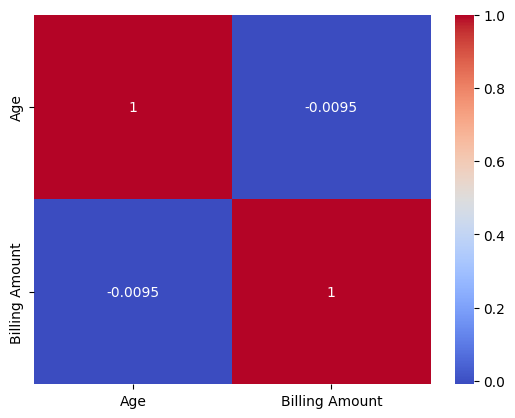

In [45]:
numerical = df.select_dtypes(include=['int64','float64']).corr()
sns.heatmap(numerical, annot=True, cmap='coolwarm')

<Axes: xlabel='Billing Amount', ylabel='Count'>

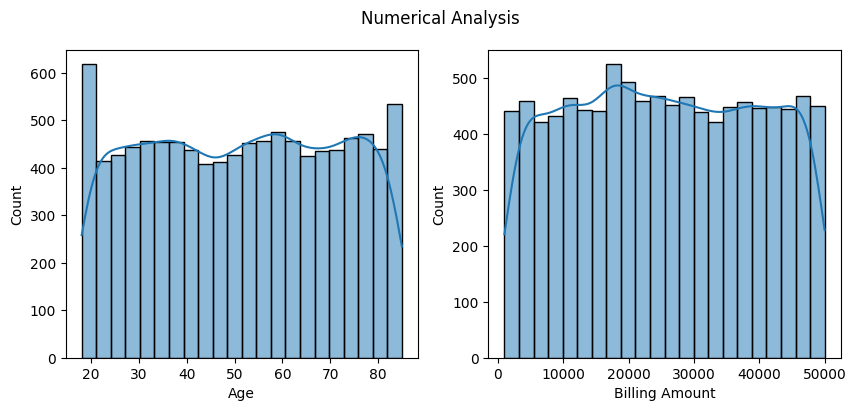

In [46]:
fig, axes = plt.subplots(1, 2, figsize=(10, 4))

fig.suptitle('Numerical Analysis')

sns.histplot(ax=axes[0], data=df, x='Age', kde=True)
sns.histplot(ax=axes[1], data=df, x='Billing Amount', kde=True)

In [47]:
def totalX(ax):
  for p in ax.patches:
      height = p.get_height()
      x = p.get_x()+p.get_width()/2
      y = height
      ax.text(x, y, int(height), ha="center")

def totalY(ax):
  for p in ax.patches:
        width = p.get_width()
        x = p.get_x() + width
        y = p.get_y() + p.get_height()/2
        ax.text(x, y, int(width))

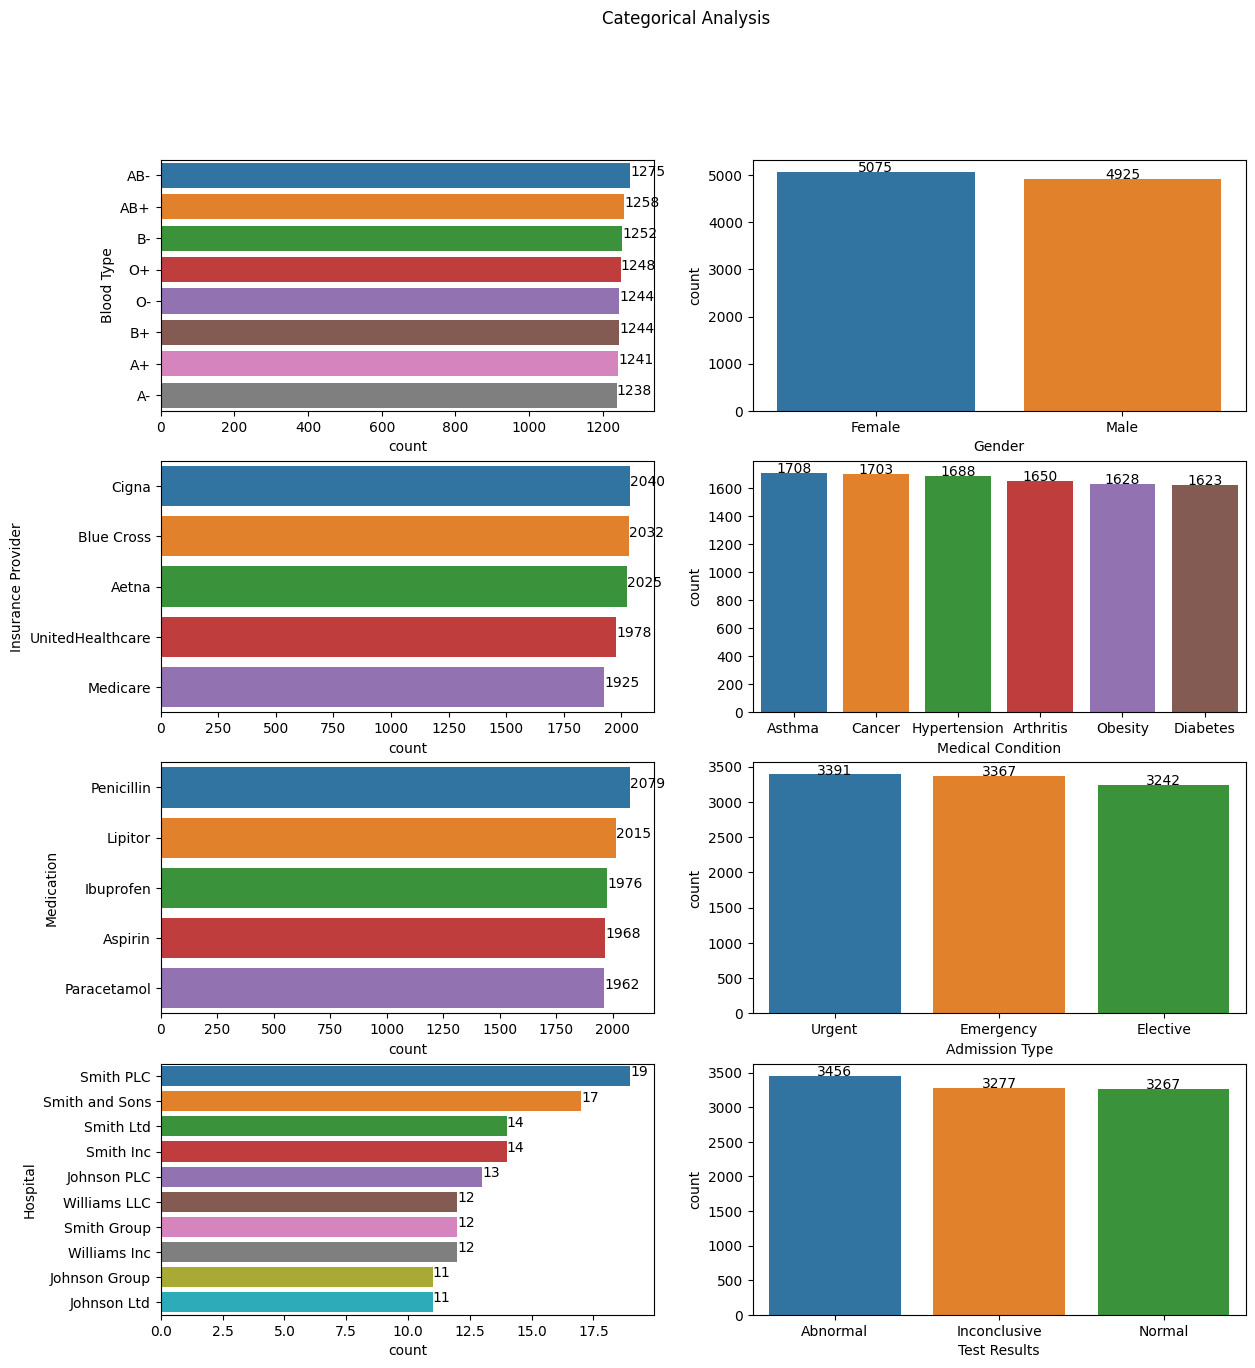

In [48]:
fig, axes = plt.subplots(4, 2, figsize=(14, 15))
fig.suptitle('Categorical Analysis')

totalY(sns.countplot(data=df, ax=axes[0, 0], y='Blood Type', order=df['Blood Type'].value_counts().index))
totalX(sns.countplot(data=df, ax=axes[0, 1], x='Gender', order=df['Gender'].value_counts().index))
totalY(sns.countplot(data=df, ax=axes[1, 0], y='Insurance Provider', order=df['Insurance Provider'].value_counts().index))
totalX(sns.countplot(data=df, ax=axes[1, 1], x='Medical Condition', order=df['Medical Condition'].value_counts().index))
totalY(sns.countplot(data=df, ax=axes[2, 0], y='Medication', order=df['Medication'].value_counts().index))
totalX(sns.countplot(data=df, ax=axes[2, 1], x='Admission Type', order=df['Admission Type'].value_counts().index))
totalY(sns.countplot(data=df, ax=axes[3, 0], y="Hospital", order=df['Hospital'].value_counts().iloc[:10].index))
totalX(sns.countplot(data=df, ax=axes[3, 1], x='Test Results', order=df['Test Results'].value_counts().index))

Text(0.5, 1.0, 'Highest Billing Amount based on Hospital')

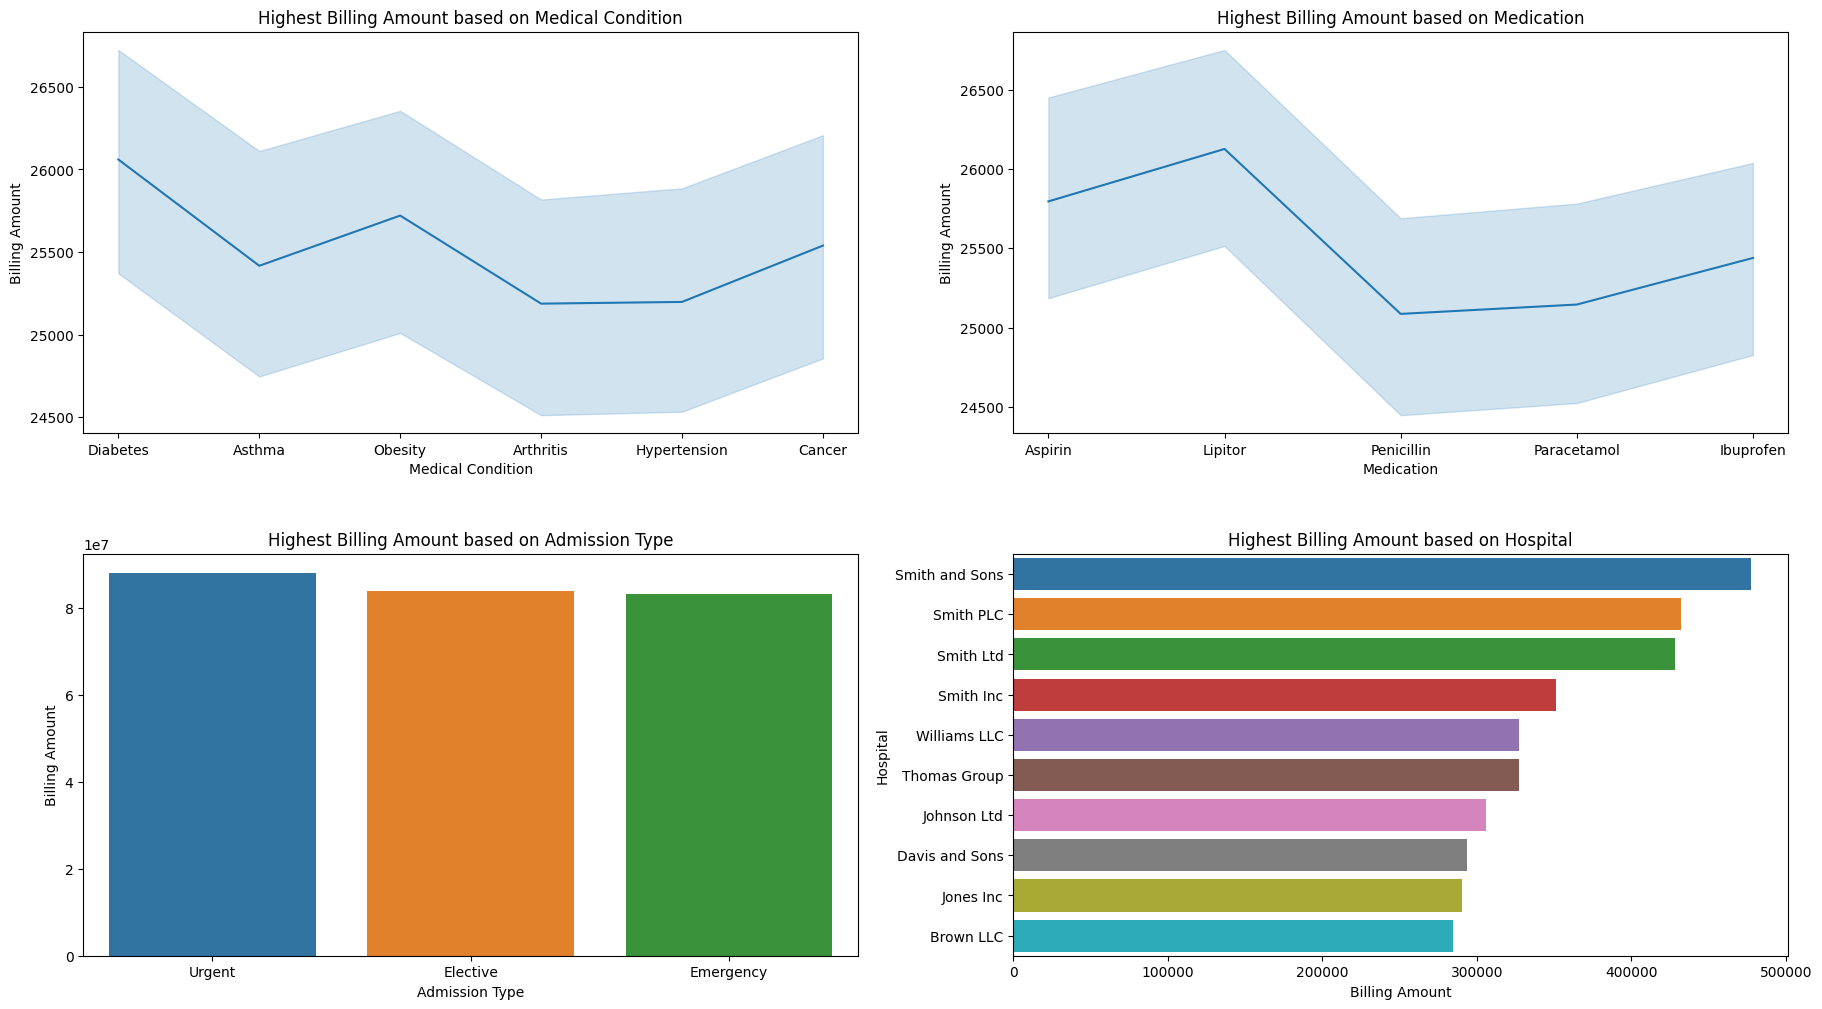

In [49]:
fig, axes = plt.subplots(2, 2, figsize=(22, 12))
fig.subplots_adjust(hspace=0.3, wspace=0.2)

df_hospital = df.groupby(['Hospital'], as_index=False).sum(numeric_only=True).sort_values(by='Billing Amount', ascending=False).iloc[:10]
df_admission_type = df.groupby(['Admission Type'], as_index=False).sum(numeric_only=True).sort_values(by='Billing Amount', ascending=False)

sns.lineplot(data=df, ax=axes[0, 0], x='Medical Condition', y='Billing Amount').set_title('Highest Billing Amount based on Medical Condition')
sns.lineplot(data=df, ax=axes[0, 1], x='Medication', y='Billing Amount').set_title('Highest Billing Amount based on Medication')
sns.barplot(data=df_admission_type, ax=axes[1, 0], x='Admission Type', y='Billing Amount').set_title('Highest Billing Amount based on Admission Type')
sns.barplot(data=df_hospital, ax=axes[1, 1], y='Hospital', x='Billing Amount').set_title('Highest Billing Amount based on Hospital')

In [50]:
df['Date of Admission']= pd.to_datetime(df['Date of Admission'])
df['Discharge Date']= pd.to_datetime(df['Discharge Date'])
df['Days Hospitalized'] = df['Discharge Date'] - df['Date of Admission']
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int) / 86400000000000
df['Days Hospitalized'] = df['Days Hospitalized'].astype(int)

df.head()

,Age,Gender,Blood Type,Medical Condition,Date of Admission,Hospital,Insurance Provider,Billing Amount,Admission Type,Discharge Date,Medication,Test Results,Days Hospitalized
0,81,Female,O-,Diabetes,2022-11-17,Wallace-Hamilton,Medicare,37490.983364,Elective,2022-12-01,Aspirin,Inconclusive,14
1,35,Male,O+,Asthma,2023-06-01,"Burke, Griffin and Cooper",UnitedHealthcare,47304.064845,Emergency,2023-06-15,Lipitor,Normal,14
2,61,Male,B-,Obesity,2019-01-09,Walton LLC,Medicare,36874.896997,Emergency,2019-02-08,Lipitor,Normal,30
3,49,Male,B-,Asthma,2020-05-02,Garcia Ltd,Medicare,23303.322092,Urgent,2020-05-03,Penicillin,Abnormal,1
4,51,Male,O-,Arthritis,2021-07-09,"Jones, Brown and Murray",UnitedHealthcare,18086.344184,Urgent,2021-08-02,Paracetamol,Normal,24


Text(0.5, 1.0, 'Days Hospitalized according to Medication')

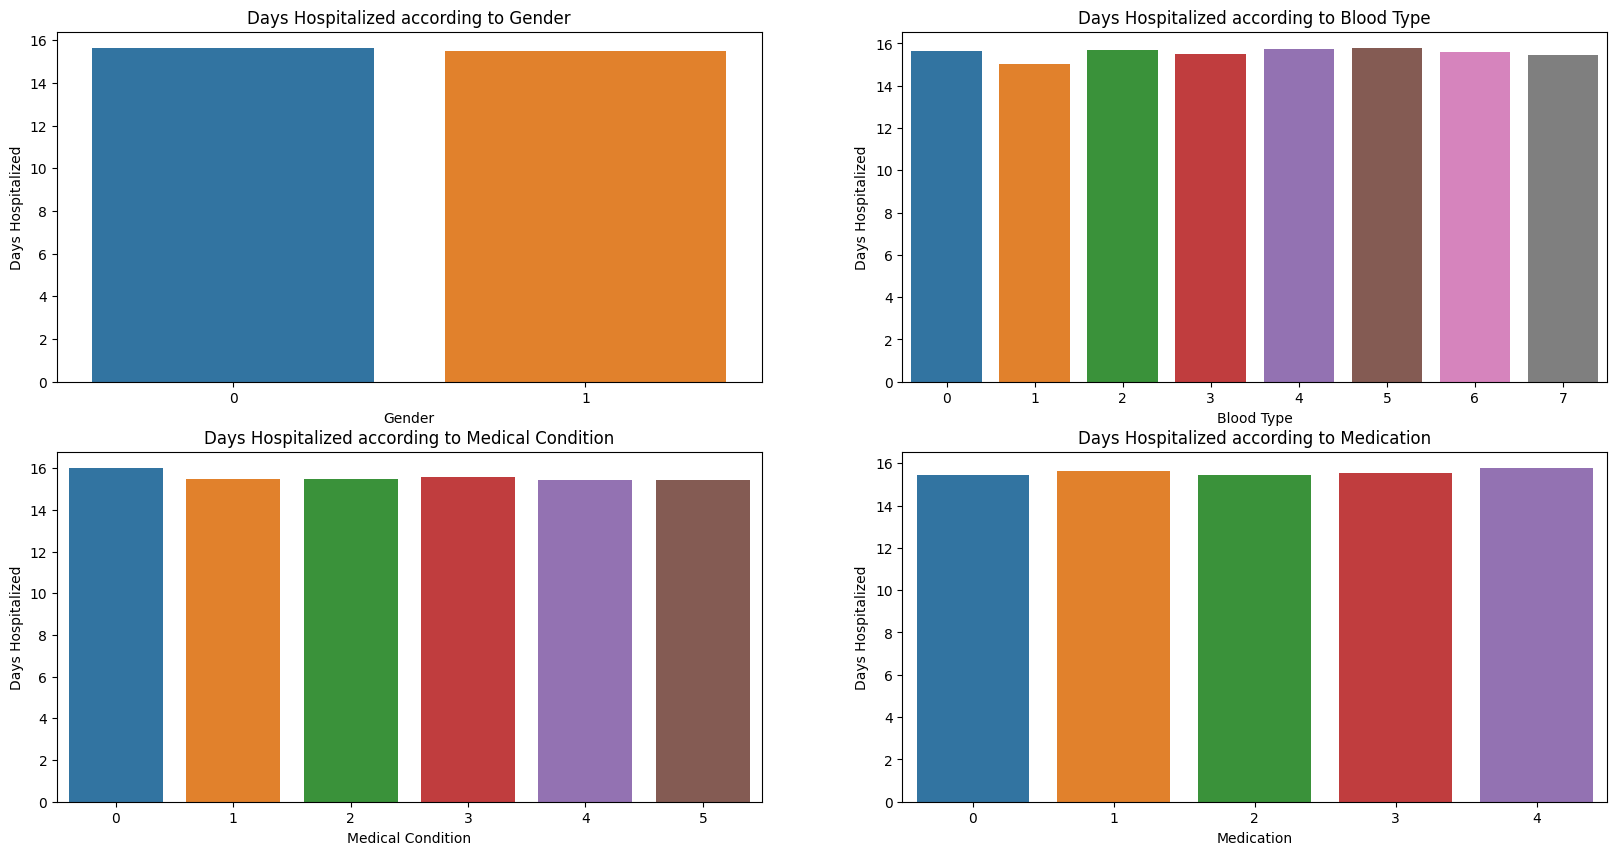

In [81]:
fig, axes = plt.subplots(2, 2, figsize=(20, 10))

df_gender = df.groupby(['Gender'], as_index=False).mean(numeric_only=True).sort_values(by=['Days Hospitalized'])
df_blood_type = df.groupby(['Blood Type'], as_index=False).mean(numeric_only=True).sort_values(by=['Days Hospitalized'])
df_medical_condition = df.groupby(['Medical Condition'], as_index=False).mean(numeric_only=True).sort_values(by=['Days Hospitalized'])
df_medication = df.groupby(['Medication'], as_index=False).mean(numeric_only=True).sort_values(by=['Days Hospitalized'])

sns.barplot(data=df_gender, ax=axes[0,0], x='Gender', y='Days Hospitalized').set_title('Days Hospitalized according to Gender')
sns.barplot(data=df_blood_type, ax=axes[0, 1], x='Blood Type', y='Days Hospitalized').set_title('Days Hospitalized according to Blood Type')
sns.barplot(data=df_medical_condition, ax=axes[1, 0], x='Medical Condition', y='Days Hospitalized').set_title('Days Hospitalized according to Medical Condition')
sns.barplot(data=df_medication, ax=axes[1, 1], x='Medication', y='Days Hospitalized').set_title('Days Hospitalized according to Medication')

**Machine Learning**

In [65]:
cat = ['Gender', 'Blood Type', 'Medical Condition', 'Admission Type', 'Medication', 'Test Results']

lc = LabelEncoder()
for i in cat:
    df[i]=lc.fit_transform(df[i])

In [66]:
X = df.drop(columns=['Date of Admission','Billing Amount', 'Discharge Date','Test Results', 'Insurance Provider', 'Hospital'], axis=1)

y = df['Test Results']

In [70]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((8000, 7), (2000, 7), (8000,), (2000,))

In [75]:
sc = StandardScaler()

X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [76]:
random = RandomForestClassifier()
random.fit(X_train,y_train)

RandomForestClassifier()

In [77]:
pred = random.predict(X_test)

In [80]:
acc = accuracy_score (y_test, pred)
print(f'Accuracy: {round(acc * 100.0, 2)}%')

Accuracy: 35.7%
